## Two colliding marbles

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# the questions: where do the marbles collide?
# and plot the trajectory before/after collision

class Marble():
    def __init__(self, mass, velocity, init_position, color):
        self.mass = mass
        self.velocity = velocity
        self.position = init_position
        self.color = color
        
    # the getters
    def get_mass(self):
        return self.mass
    def get_speed(self):
        return self.velocity
    def get_start(self):
        return self.position
    def get_color(self):
        return self.color
    
    # the purpose of this sole setter is to update the velocity post-collision.
    # I can't do that here yet because the equations for that dependent on the
    # initial conditions of BOTH marbles, which have yet to be defined
    def set_speed(self, new_v):
        self.velocity = new_v
        
# I make the marbles here:
blue = Marble(1, 5, 1, 'blue')
red = Marble(2, -2, 4, 'red')


if red.get_start() < blue.get_start():
    left_marb = red
    right_marb = blue
    # strictly speaking, the else condition could include the edge case that both positions are equal.
    # but I'm ignoring that because there'd be no collison, which would be dumb.
else:
    left_marb = blue
    right_marb = red
    
del_x = abs(blue.get_start() - red.get_start()) # the initial distance between the marbles
speed_of_both = abs(blue.get_speed() - red.get_speed()) # the speed each perceives the other to be in its Galilean frame
del_t = del_x / speed_of_both # time interval from start to collision

collision_point = left_marb.get_start() + left_marb.get_speed() * del_t

# there's your first answer!

In [3]:
# our next goal is to plot the before and after trajectories. 
# this function will make a plot for each marble
def draw_graph(x,y,xmin,xmax, givencolor):
    plt.plot(x, y, markersize = .8, color = givencolor)
    plt.xlabel('Time')
    plt.ylabel('x-position')
    plt.title('Collision')
    plt.xlim((xmin, 1.5*xmax))

In [4]:
# loop over the two marbles, make a nice graph for them both
# todo: somehow save the t's and x's as variables I can access later
t_list = []
x_list = []
marble_list = [blue, red]
for marble in [blue, red]:
    t = np.arange(0.0, del_t, 0.001)
    x = marble.get_start() + marble.get_speed()*t
    
    t_list.append(t)
    x_list.append(x)
        
    # the above code gets the before graph's data. let's get the after:

In [5]:
# calculate the after velocity for each marble
after_v_r = blue.get_speed()*(2*blue.get_mass()/(blue.get_mass() + red.get_mass())) + red.get_speed()*(red.get_mass() - blue.get_mass())/(blue.get_mass()+red.get_mass())
after_v_b = red.get_speed()*(2*red.get_mass()/(blue.get_mass() + red.get_mass())) + blue.get_speed()*(blue.get_mass() - red.get_mass())/(blue.get_mass()+red.get_mass())

# set the speed to appropriate post-collision value
red.set_speed(after_v_r)
blue.set_speed(after_v_b)

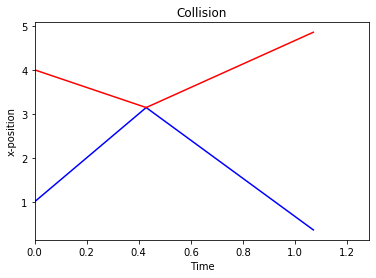

In [6]:
# the ultimate goal should be to make these into one pretty plot
# to this end, we want to append the new data to the graph's old data
# todo: figure out a way to do that ^
for i in range(2):
    new_t_data = np.arange(del_t, 2.5*del_t, 0.001)
    new_x_data = collision_point + marble_list[i].get_speed() * (new_t_data - del_t)
    
    # draw the first graph
    draw_graph(t_list[i], x_list[i], 0, del_t, marble_list[i].get_color()) 
    # draw the second graph
    draw_graph(new_t_data, new_x_data, 0, 2*del_t, marble_list[i].get_color())
    